# Graded Challenge 2

```txt
Adnan Rio
Batch 14
```

## Description

### Objective

```txt
1.  Mampu memperoleh data menggunakan BigQuery
2.  Mampu melakukan pemrosesan data sebelum melakukan perhitungan
3.  Mampu menerapkan konsep kalkulus dan linear algebra pada suatu permasalahan
4.  Mampu memahami konsep kalkulus dan linear algebra
```

### Problem Statement

```txt
1. Mencari stasiun awal mana yang paling favorit di antara stasiun-stasiun lainnya dengan menghitung PageRank menggunakan Eigendecomposition.
2. Mencari luas area lingkup stasiun awal sepeda di kota San Francisco
```

## Working Area



In [31]:
import pandas as pd #   Memanggil library panda kemudian menganti alias pd
import numpy as np #    Memanggil library numpy kemudian menganti alias np

In [115]:
df=pd.read_csv('h8dsft_P0GC2_Set_1_adnan_rio.csv')

 `query yang telah dibuat di Google Cloud Platform`

In [33]:
#SELECT  
  #bst.trip_id,
  #bst.start_station_name, 
  #bst.end_station_name,
  #bst.start_date,
  #bst.start_station_latitude,
  #bst.start_station_longitude,
  #bst.end_station_latitude, 
  #bst.end_station_longitude,
  #bsti.region_id,
#FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` AS bst
#LEFT JOIN `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` AS bsti
#ON bst.start_station_name=bsti.name
#WHERE bst.start_station_name != bst.end_station_name
  #AND bst.start_station_latitude !=0
  #AND bst.start_station_longitude !=0
  #AND bst.end_station_latitude!=0 
  #AND bst.end_station_longitude !=0
  #AND bsti.region_id !=0
  #AND bst.start_date BETWEEN '2017-05-15' AND '2018-10-15'

In [107]:
df.head(5) # Melihat 5 data teratas

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,13752017072215524300,2017-07-22T15:52:43Z,Bushrod Park,Snow Park,37.846516,-122.265304,37.807813,-122.264496,12
1,11702017101108425500,2017-10-11T08:42:55Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
2,6732017071815165800,2017-07-18T15:16:58Z,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
3,11502017090415222400,2017-09-04T15:22:24Z,DeFremery Park,Snow Park,37.812331,-122.285171,37.807813,-122.264496,12
4,2472017073111171400,2017-07-31T11:17:14Z,45th St at Manila,Snow Park,37.833294,-122.256224,37.807813,-122.264496,12


In [ ]:
df.tail()  # Melihat 5 data terbawah

In [ ]:
df.isnull().sum() # Memeriksa jumlah data yang kosong dari tiap colom

`Mencari stasiun awal mana yang paling favorit di antara stasiun-stasiun lainnya dengan menghitung PageRank menggunakan Eigendecomposition
`

`1. Buatlah dua variable baru yang bernama start_stations dan end_stations yang masing-masing berisikan list nama stasiun awal dan stasiun akhir. Pastikan tidak ada    nama stasiun yang duplikat di masing-masing variable.
`

In [ ]:
sstasiun = df['start_station_name'].unique()
estasiun = df['end_station_name'].unique()
sum(df['start_station_name'] == df['end_station_name'])

0

`2. Deteksi stasiun-stasiun yang hanya terdapat di salah satu variable dan tidak di keduanya (exclusive-or/xor) menggunakan np.setxor1d(array1,array2). Outputnya akan berupa numpy array dan masukkan output tersebut ke dalam variable bernama exclusive_stations`

In [ ]:
exclusive_stations = np.setxor1d(sstasiun,estasiun) # Menjadikan array di query terhadap sstasiun dan estasiun mengunakan table join (exclusive-or/xor)
exclusive_stations

`3. Buat dataframe yang berisikan cross-tabulation antara start_stations dan end_stations menggunakan pd.crosstab(pd.Series1,pd.Series2). Hasil dari langkah ini akan menghasilkan dataframe yang menginfokan berapa jumlah/frekuensi perjalanan dari start station tertentu ke end station tertentu. Hasil dari langkah ini dimasukkan ke dalam variable bernama df_matrix`

In [ ]:
df_matrix = pd.crosstab(df['start_station_name'],df['end_station_name'])
df_matrix

In [ ]:
df_matrix.shape

`4. Buatlah salinan dari data yang di-load ke dalam variable bernama df_copy`

In [ ]:
df_copy = df.copy()

`5. Filter df_copy dimana tidak ada start_station_name dan end_station_name yang termasuk dalam list exclusive_stations`

In [ ]:
# Query terhadap Filter df_copy dimana tidak ada start_station_name dan end_station_name yang termasuk dalam list exclusive_stations
flr_1= ~df_copy['start_station_name'].isin(exclusive_stations)
flr_2 = ~df_copy['end_station_name'].isin(exclusive_stations)
flr_add = flr_1 & flr_2
df_copy=df_copy[flr_add] # filter terhadap df_copy 
flr_add

`6. Lakukan langkah 3 untuk variable df_copy dan simpan ke dalam variable bernama df_matrix_square. Pastikan jumlah rows dan columns sama, kalau tidak ulangi dari langkah 4`

In [ ]:
df_matrix_square = pd.crosstab(df_copy['start_station_name'],df_copy['end_station_name'])
df_matrix_square

In [63]:
df_matrix_square.shape #df_matrix_square dalam kolom dan baris yg sama dapat menerapkan Eigendecomposition

(259, 259)

`7. Jumlahkan nilai kolom masing-masing rows pada df_matrix_square menggunakan method sum(axis=1) dan simpan ke dalam variable bernama total_trips`

In [87]:
total_trips = df_matrix_square.sum(axis=1) # Memeriksa jumlah data pada kolom total_trips

`8. Bagi setiap kolom df_matrix_square dengan menggunakan method .div(), dengan inputan parameter total_trips dan axis='rows'. Masukkan hasilnya ke variable weighted_matrix_df`

In [ ]:
weighted_matrix_df = df_matrix_square.div(total_trips, axis='rows') # Membagi tiap elemen pada baris df_matrix_square 
weighted_matrix_df

`9. Konversikan weighted_matrix_df ke numpy array`

In [66]:
weighted_matrix_arr = weighted_matrix_df.to_numpy() # Mengubah data frame ke array

`10. Hitung eigen value dan eigen vector menggunakan library numpy`

In [67]:
eigVal,eigVec = np.linalg.eig(weighted_matrix_arr)

In [ ]:
eigVal

In [ ]:
eigVec

In [70]:
## kita akan mencari nilai modulus atau argument dari eigenvalue
eigVal = np.abs(eigVal) 
eigVec = np.abs(eigVec)

`11. Score PageRank terdapat pada eigen vector yang eigen valuenya paling tinggi. Simpan eigen vector tersebut ke dalam variable bernama PR_Scores`

In [ ]:
idx = eigVal.argmax() # Mengetahui indeks pada eigenvalue tertinggi
PR_scores = eigVec[:,idx] # Mengetahui eigenvector dengan eigenvalue tertinggi

`12. Buat dataframe baru bernama PageRank_df dengan kolom 'start_station' yang berisikan value variable start_stations dan kolom score yang berisikan value variable PR_Scores`

In [ ]:
PageRank_df = pd.DataFrame({'start_station':df['start_station_name'].unique(),'PR_Scores':PR_scores})
PageRank_df

`13.  Tampilkan head dari dataframe PageRank_df!`

In [94]:
PageRank_df.head()

,start_station,PR_Scores
0,Mosswood Park,0.067116+0.000000j
1,45th St at Manila,0.067116+0.000000j
2,Jack London Square,0.067116+0.000000j
3,Bay Pl at Vernon St,0.067116+0.000000j
4,Broadway at 30th St,0.067116+0.000000j


A.  Mengapa dalam kasus ini kita menerapkan konsep Eigendecomposition?
    Dengan menghitung suatu matriks persegi yang tiap kolomnya adalah eigenvector dan matriks diagonal dengan elemen tiap diagonalnya adalah eigenvalue kita bisa langsung dapat memprediksi statsiun favorit 

B. Dari pengamatanmu, mengapa pada akhirnya kita menggunakan dataframe df_matrix_square dibandingkan df_matrix untuk dilakukan proses Eigendecomposition? Berikan alasan yang logis sesuai dengan konsep Eigendecomposition. == Karena jumlah baris dan kolom pada df_matrix_square adalah sama kita dapat menerapkan konsep Eigendecomposition

In [ ]:
print(f'df_matrix_square jumlah baris dan kolom {weighted_matrix_arr.shape}')

Sedangkan pada df_matrix jumlah baris dan kolom tidak sama

In [ ]:
print(f'df_matrix jumlah baris dan kolom {df_matrix.to_numpy().shape}')

C.  Jika dilihat dari PageRanknya, dimana nilai PageRank paling besar merupakan stasiun yang paling favorit. Apa insight yang akan kamu berikan?

In [114]:
PageRank_df.sort_values('PR_Scores', ascending=False).head(5)

,start_station,PR_Scores
2,Jack London Square,0.067116+0.000000j
16,13th St at Franklin St,0.067116+0.000000j
12,Webster St at 2nd St,0.067116+0.000000j
9,24th St at Market St,0.067116+0.000000j
140,Eureka Valley Recreation Center,0.067116+0.000000j


Jika dilihat berdasarkan nilai PR_Score, Jack London Square adalah stasiun favorit akan tetapi 4 stasiun dibawahnya tidak berbeda jauh

`------------------------------Mencari luas area lingkup stasiun awal sepeda di kota San Francisco-------------------------------`

`1. Buat variable baru bernama df_coor_stations yang berisikan data yang sudah di-load dimana kolom region_id = 3. Pastikan tidak ada data yang duplikat dan hanya menyertakan kolom start_station_name,start_station_latitude, dan start_station_longitude. Urutkan pula dataframe tersebut berdasarkan start_station_longitude dari nilai terkecil hingga terbesar.`

In [ ]:
df_flr_region = df['region_id'] == 3
df_coor_stations = df[df_flr_region][['start_station_name','start_station_latitude','start_station_longitude']] #Menerapkan query region
df_coor_stations.drop_duplicates(subset=['start_station_name'],inplace=True) #Mdrop duplikat nama di kolom start_station_name
df_coor_stations.sort_values('start_station_longitude', inplace=True) # sort longitude
df_coor_stations

`2. Plot grafik area stasiun-stasiun di San Fransisco menggunakan method .plot(). Catatan: Gunakan arahan berikut dalam penggunaan method .plot(), .plot(x='nama kolom untuk sumbu x',y='nama kolom untuk sumbu y',figsize=(20,8)). Longitude merupakan sumbu x dan Latitude merupakan sumbu y.`

<AxesSubplot:xlabel='start_station_longitude'>

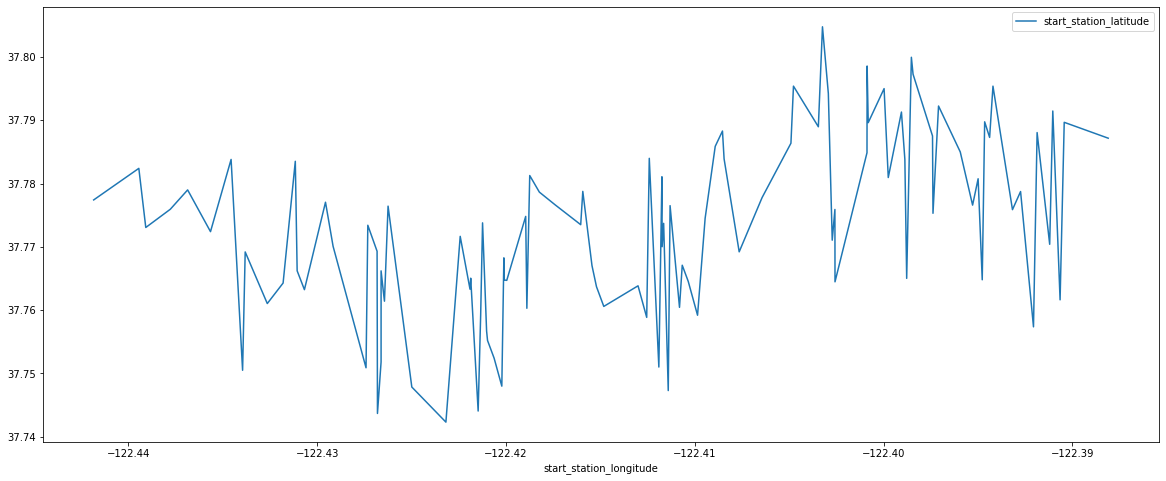

In [119]:
df_coor_stations.plot(x='start_station_longitude',y='start_station_latitude',figsize=(20,8))

`3. Hitung luas area yang dilingkup stasiun awal menggunakan library Scipy. Hasilnya bersatuan square degree.`

In [116]:
from scipy import integrate # Import library
from scipy.integrate import trapz

In [ ]:
# Menggunakan trapz dengan nilai adalah 'start_station_lattitude' pada interval dari 'start_station_longitude'
area = integrate.trapz(df_coor_stations['start_station_latitude'],df_coor_stations['start_station_longitude'])
print(f'Luas area yang dilingkup stasiun awal sebesar {round(area,2)} square degree. ')

a. Terdapat 2 jenis integral yaitu definite dan indefinite. Jenis integral apa yang kamu gunakan untuk kasus ini? Berikan alasanmu!
   Definite karena luas yang dibatasi oleh kurva yang mempunyai titik atas dan titik bawah

b. Terdapat dua metode dalam perhitungan integral yaitu simbolik dan numerik. Mana yang kamu gunakan untuk kasus ini dan mengapa?
   Numerik karena hanya terdapat beberapa titik saja (latitude), tidak diketahui fungsi terhadap (longitude) namun kita masih dapat memprediksi dengan intergal numerik (metode trapesium), luas trapesium tersebut berdasarkan titik-titik yang kita dapatkan dari peta

c. Apakah diperlukan mendefinisikan fungsi matematis ( seperti `f(x) = x^2+2` ) pada kasus ini? Berikan penjelasan dan alasanmu!
   Tidak perlu. Kita sudah menggunakan intergral numerik untuk memperkirakan luas yang tidak memerlukan fungsi matematis seperti `f(x) = x^2+2`